## EDA for Home Loans

Standard Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.
As Africa’s biggest lender by assets, the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.

To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application. 

The data provided can be found in the Resources folder as well as (https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).

I follow the data science lifecycle CRoss Industry Standard Process for Data Mining (CRISP-DM), to fulfill the objective. The data science lifecycle (https://www.datascience-pm.com/crisp-dm-2/) includes:

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment.



## Import Libraries




In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

## Import Datasets

In [7]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [9]:
train.shape

(614, 13)

In [11]:
test.shape

(367, 12)

# Part One

## EDA

In [15]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


1- Understanding data

In [26]:
df.shape

(614, 13)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [30]:
df.duplicated().sum()

np.int64(0)

In [32]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

**Observation** : 
- The dataset has 981 rows and 13 columns.
- There several missing values in some columns. This problem can be solved by using the median in the case of numerical variables or the mode in the case of categorical variables to repace the NAN values.
- The data type of the 'Credit_History' column could be transformed into an object and replace the values 1 by ‘Yes’ and 0 by ‘No’.
- As The 'Credit_History' only has the value 1 and 0, we can replace them by more explicit values such as 'Good' or 'Bad' to indicate whether a candidate has a good or bad credit history.
- There are no duplicate values in the dataset.


2- Analysis of missed values

In [36]:
df_cleaned = df.copy()

In [38]:
# Change 'Credit_History' data type in to object
#df_cleaned['Credit_History'] = df_cleaned['Credit_History'].astype('object')

# Replace the values '1' by 'Yes' and '0' by 'No'
df_cleaned['Credit_History'] = df_cleaned['Credit_History'].map({1: 'Good', 0: 'Bad'})

In [40]:
# Fix NA values

# Replace na by the median for numerical values
df_cleaned['CoapplicantIncome'] = df_cleaned['CoapplicantIncome'].fillna(df_cleaned['CoapplicantIncome'].median())
df_cleaned['LoanAmount'] = df_cleaned['LoanAmount'].fillna(df_cleaned['LoanAmount'].median())
df_cleaned['Loan_Amount_Term'] = df_cleaned['Loan_Amount_Term'].fillna(df_cleaned['Loan_Amount_Term'].median())

# Replace na by the mode for categorical values
df_cleaned['Gender'] = df_cleaned['Gender'].fillna(df_cleaned['Gender'].mode()[0])
df_cleaned['Married'] = df_cleaned['Married'].fillna(df_cleaned['Married'].mode()[0])
df_cleaned['Dependents'] = df_cleaned['Dependents'].fillna(df_cleaned['Dependents'].mode()[0])
df_cleaned['Self_Employed'] = df_cleaned['Self_Employed'].fillna(df_cleaned['Self_Employed'].mode()[0])
df_cleaned['Credit_History'] = df_cleaned['Credit_History'].fillna(df_cleaned['Credit_History'].mode()[0])
df_cleaned['Loan_Status'] = df_cleaned['Loan_Status'].fillna(df_cleaned['Loan_Status'].mode()[0])


In [42]:
# Verify whether all data types are fine now
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


3- Analysis of Descriptive statistics

- Statistical summary of numerical values : 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'.
- Examine the distribution of the categorical variables : 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Credit_History'.

In [45]:
df_cleaned.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


In [47]:
# Analyse the proportions of applications for each categorical value

categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns

categorical_columns = categorical_columns.drop('Loan_ID')

for i in categorical_columns:
    print('\nCount applications by the variable:', i)
    print(df_cleaned[i].value_counts())


Count applications by the variable: Gender
Gender
Male      502
Female    112
Name: count, dtype: int64

Count applications by the variable: Married
Married
Yes    401
No     213
Name: count, dtype: int64

Count applications by the variable: Dependents
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

Count applications by the variable: Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Count applications by the variable: Self_Employed
Self_Employed
No     532
Yes     82
Name: count, dtype: int64

Count applications by the variable: Credit_History
Credit_History
Good    525
Bad      89
Name: count, dtype: int64

Count applications by the variable: Property_Area
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Count applications by the variable: Loan_Status
Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [49]:
# Calculate the proportions of Loan_Status

accepted = round(((df_cleaned['Loan_Status'].value_counts()['Y'] * 100) / df_cleaned.shape[0]), 2)
refused = round(((df_cleaned['Loan_Status'].value_counts()['N'] * 100) / df_cleaned.shape[0]), 2)
print("There are applications", accepted, "% accepted and applications", refused, "% refused.")

There are applications 68.73 % accepted and applications 31.27 % refused.


In [51]:
# Calculate the number of applicants who have Dependents
nb_applicants_with_dependents = df_cleaned.shape[0] - df_cleaned['Dependents'].value_counts()['0']

nb_applicants_with_dependents

np.int64(254)

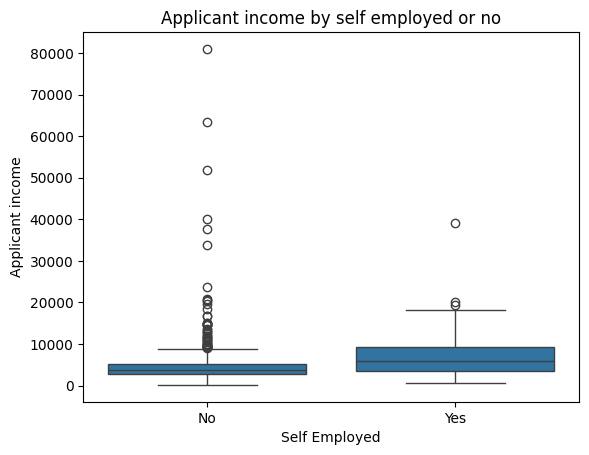

In [53]:
# Compare the incomes of those who are employed to those who are self employed by using boxplot

df_income = df_cleaned[['Self_Employed', 'ApplicantIncome']]

sns.boxplot(x='Self_Employed', y='ApplicantIncome', data=df_income)
plt.title(f'Applicant income by self employed or no')
plt.xlabel('Self Employed')
plt.ylabel(f'Applicant income')
plt.show()
    

In [55]:
# Proportion of applications with a good credit history accepted
df_app_with_credit_hist = df_cleaned[(df_cleaned['Credit_History'] == 'Good')]
df_app_accepted_with_credit_hist = df_cleaned[(df_cleaned['Credit_History'] == 'Good') & (df_cleaned['Loan_Status'] == 'Y')]
prop_app_accepted_with_credit_hist = round(((df_app_accepted_with_credit_hist.shape[0] * 100) / df_app_with_credit_hist.shape[0]), 2)
#prop_app_accepted_with_credit_hist

# Proportion of applications accepted with no credit history
df_app_withno_credit_hist = df_cleaned[(df_cleaned['Credit_History'] == 'Bad')]
df_app_accepted_withno_credit_hist = df_cleaned[(df_cleaned['Credit_History'] == 'Bad') & (df_cleaned['Loan_Status'] == 'Y')]
prop_app_accepted_withno_credit_hist = round(((df_app_accepted_withno_credit_hist.shape[0] * 100) / df_app_withno_credit_hist.shape[0]), 2)
prop_app_accepted_withno_credit_hist

print('Proportion of applications with a good credit history accepted: ', prop_app_accepted_with_credit_hist, "%")
print('Proportion of applications with a bad credit history accepted:', prop_app_accepted_withno_credit_hist, "%")

Proportion of applications with a good credit history accepted:  79.05 %
Proportion of applications with a bad credit history accepted: 7.87 %


**Observation**:
- Men are apply more loans than women.
- Married people apply for more loans than single people.
- People with the fewest dependents seem to apply for more loans than others.
- Graduates seem to be more comfortable applying for a loan than non-graduates.
- Most loan applicants no self-employed.
- The property area does not really seem to play a role in a loan application.
- People with a good credit history apply for a loan more often than people with bad credit history.
- Most loan applications are accepted.
- There are applications 68.73 % accepted and applications 31.27 % refused.
- There are 411 applicants who have dependents.
- The mean income of self-employed applicants is higher than that of applicants who are not self-employed.
- The applications with good credit history are more likely to be accepted than the applications with a bad credit history.


For further analysis, it would be interesting to check the proportions of loan status for each of these variables to see if there is a specific characterictics that is more favourable to obtaining a loan.


4- Univariate visualisations

- Histograms for numeric variables : 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History';
- Bar chart for categorical variables : 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'

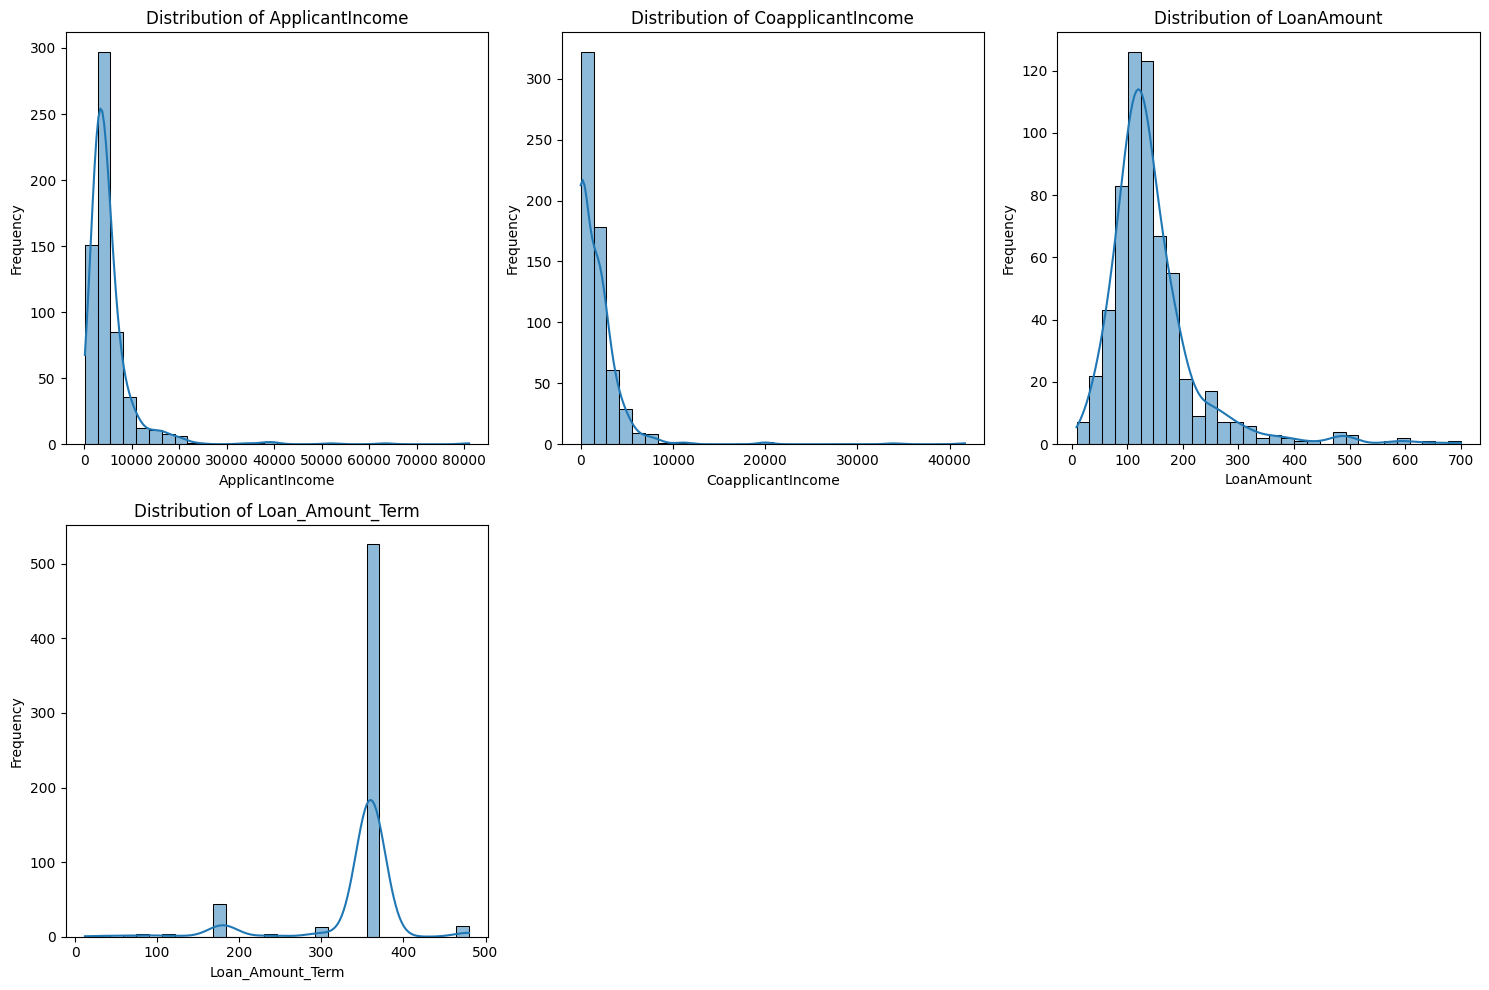

In [60]:
# Create a set of histograms for all the numerical variables

# Select only the numerical variables
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns


# Determine the number of rows and columns for the sub graphics
num_vars = len(numeric_columns)
num_cols = 3
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)  # Calculate  the number of rows needed

# Create a figure for displaying histrograms
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten axes for easier indexing
axes = axes.flatten()

# Display histograms
for i, col in enumerate(numeric_columns):
    sns.histplot(df_cleaned[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty axes if any
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Ajust the space between the graphics
plt.tight_layout()
plt.show()


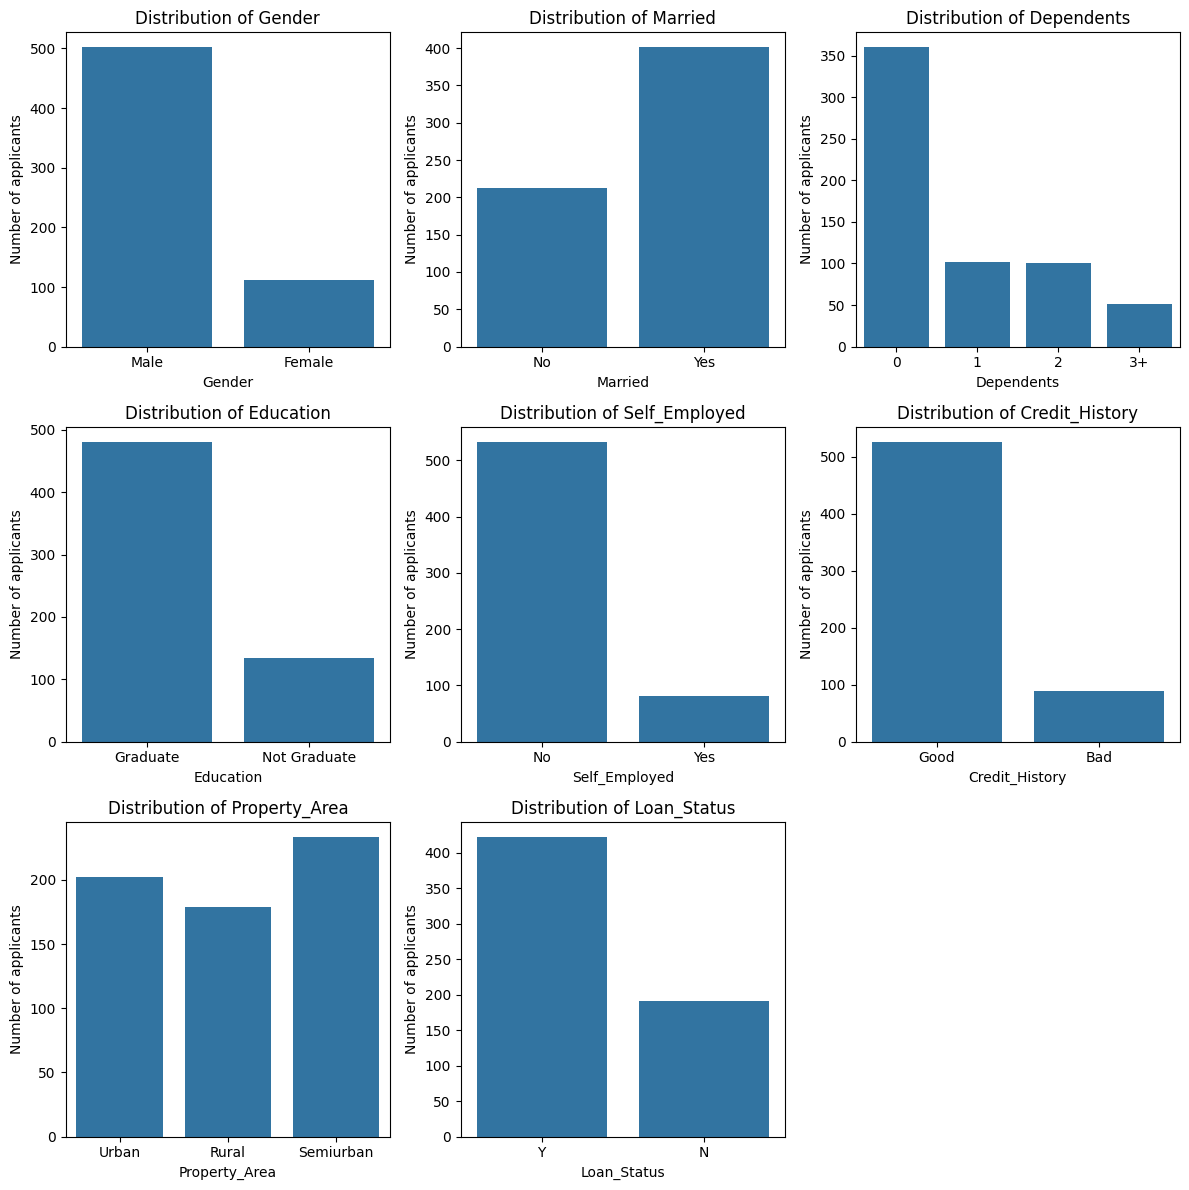

In [62]:
# Create a set of bar chart for all the categorical variables

# Select only categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns

# Remove Loan_ID column
categorical_columns = categorical_columns.drop('Loan_ID')

# Determine the number of rows and columns for the sub-graphics
num_vars = len(categorical_columns)
num_cols = 3  
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)  # Calculate the number of rows needed

# Create a figure to display graphics
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))

# Flatten axes for easir indexing
axes = axes.flatten()

# Display bar chart for each categorical variable
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df_cleaned, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Number of applicants')

# Remove empty axes if any
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Ajuste space between graphics
plt.tight_layout()
plt.show()


5- Bivariate visualisations

- Explore features by loan status
- Explore relations between numeric variables

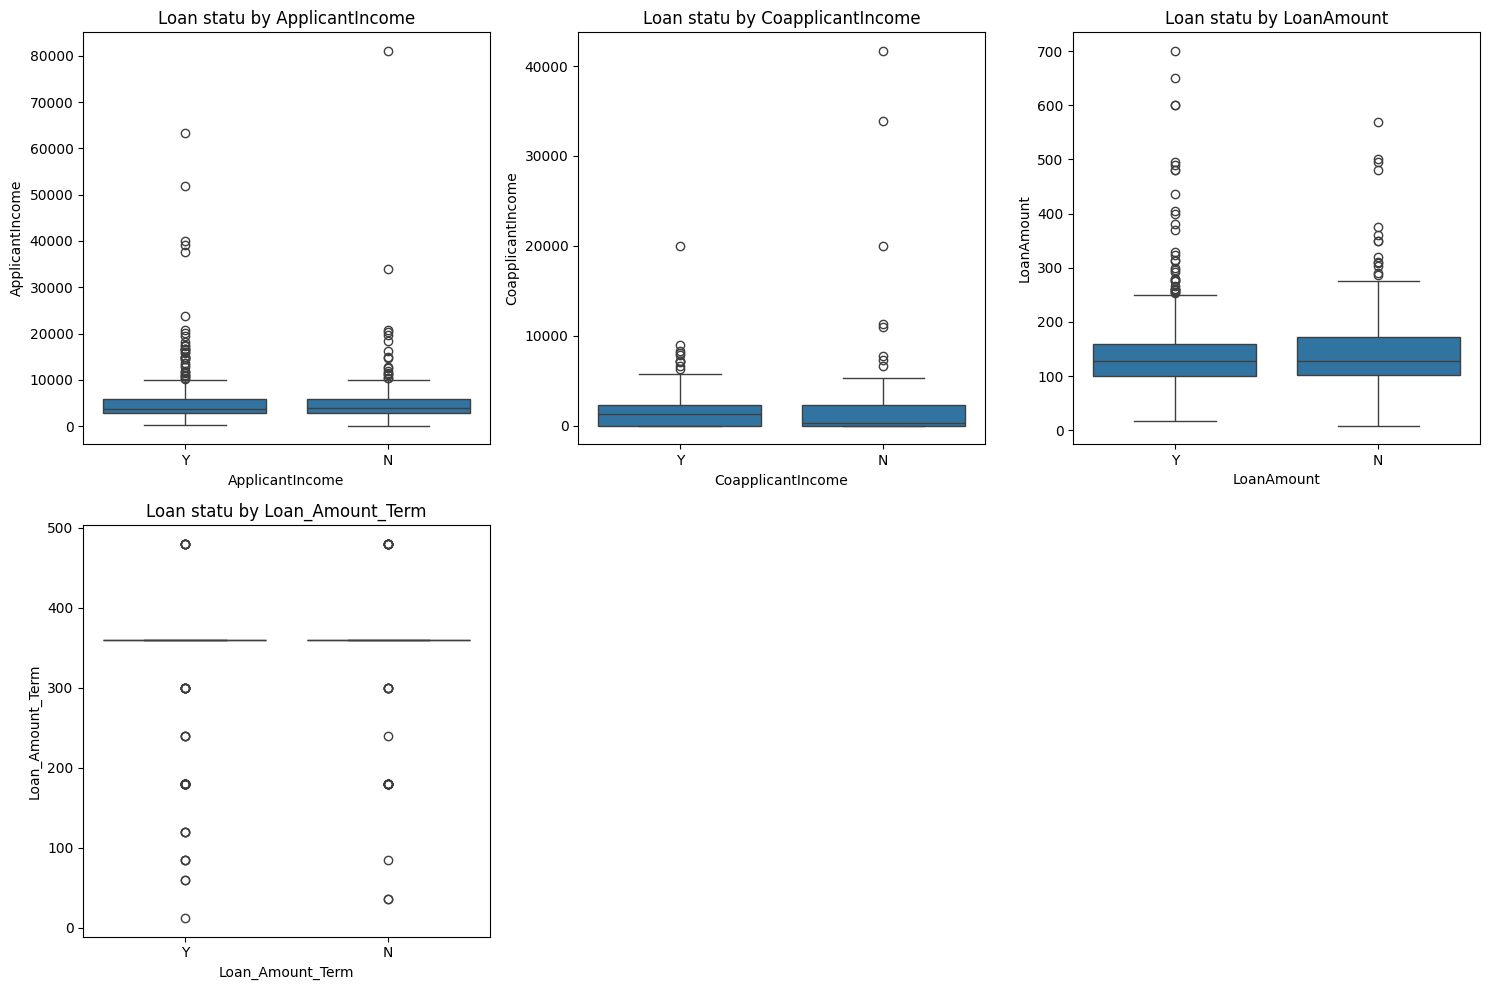

In [65]:
# Check the differences between the applicants who obtained the loan and those who did not

# Create a set of box plot for all the numeric variables and the Loan_Statut

# Select only categorical columns
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows and columns for the sub-graphics
num_vars = len(numeric_columns)
num_cols = 3  
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)  # Calculate the number of rows needed

# Create a figure to display graphics
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten axes for easir indexing
axes = axes.flatten()

# Display bar chart for each numeric variable
for i, col in enumerate(numeric_columns):
    sns.boxplot(x='Loan_Status', y=col, data=df_cleaned, ax=axes[i])
    axes[i].set_title(f'Loan statu by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(f'{col}')

# Remove empty axes if any
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Ajuste space between graphics
plt.tight_layout()
plt.show()


**Observation**:
It seems that most of the applications that are not validated are those with low-income co-applicants.

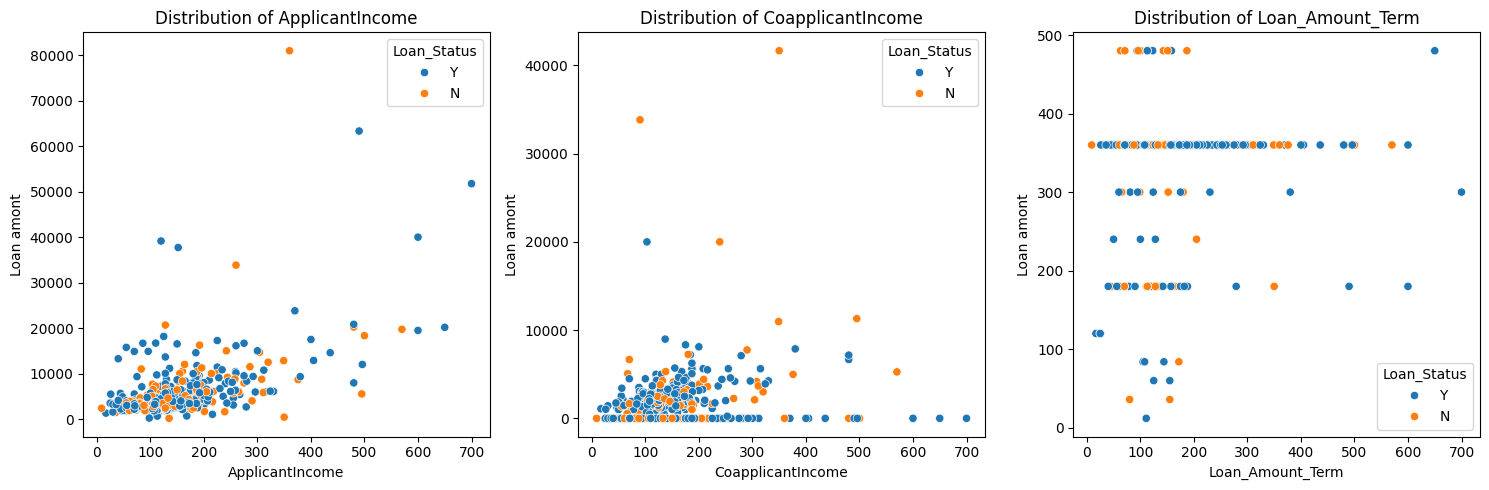

In [68]:
# Explore correlation between LoanAmount some numeric variables

# Select only the numerical variables
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

numeric_columns = numeric_columns.drop('LoanAmount') # We need to explore corelation between loan amount and other variable

# Determine the number of rows and columns for the sub graphics
num_vars = len(numeric_columns)
num_cols = 3
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)  # Calculate  the number of rows needed

# Create a figure for displaying histrograms
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten axes for easier indexing
axes = axes.flatten()

# Display histograms
for i, col in enumerate(numeric_columns):
    sns.scatterplot(x='LoanAmount', y=col, hue='Loan_Status', data=df_cleaned, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Loan amont')

# Remove empty axes if any
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Ajust the space between the graphics
plt.tight_layout()
plt.show()



7- Analysis of relationships between variables

- Visualise correlation betwee numerical variables with a correlation matrix
- Comparison of the proportions of each categorical value in relation to the Loan_Status target using barchars

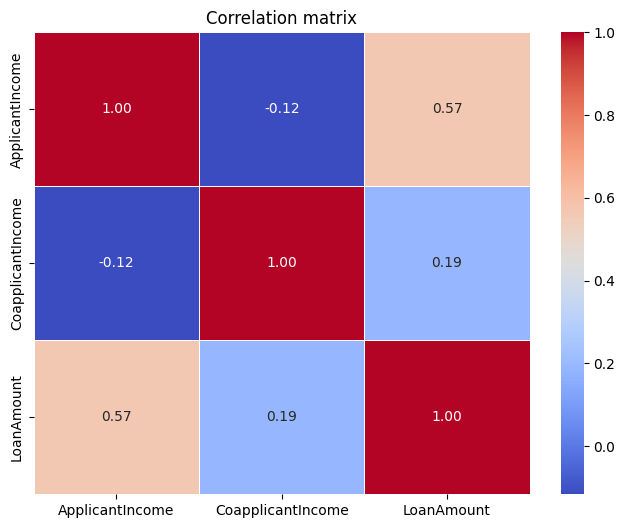

In [80]:
# Build a correction matrix of the numerical variables

# Select numerical column of interest from the dataset : 'ApplicantIncome', 'CoapplicantIncome' and 'LoanAmount'

df_numeric = df_cleaned[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()
#print(correlation_matrix)

# Use to check strong correlation
strong_corr = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
#print(strong_corr)


# Visualise the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

**Observation**:
The amount of the loan seems to correlate fairly strongly with the income of the applicant and less strongly with the income of the co-applicant.

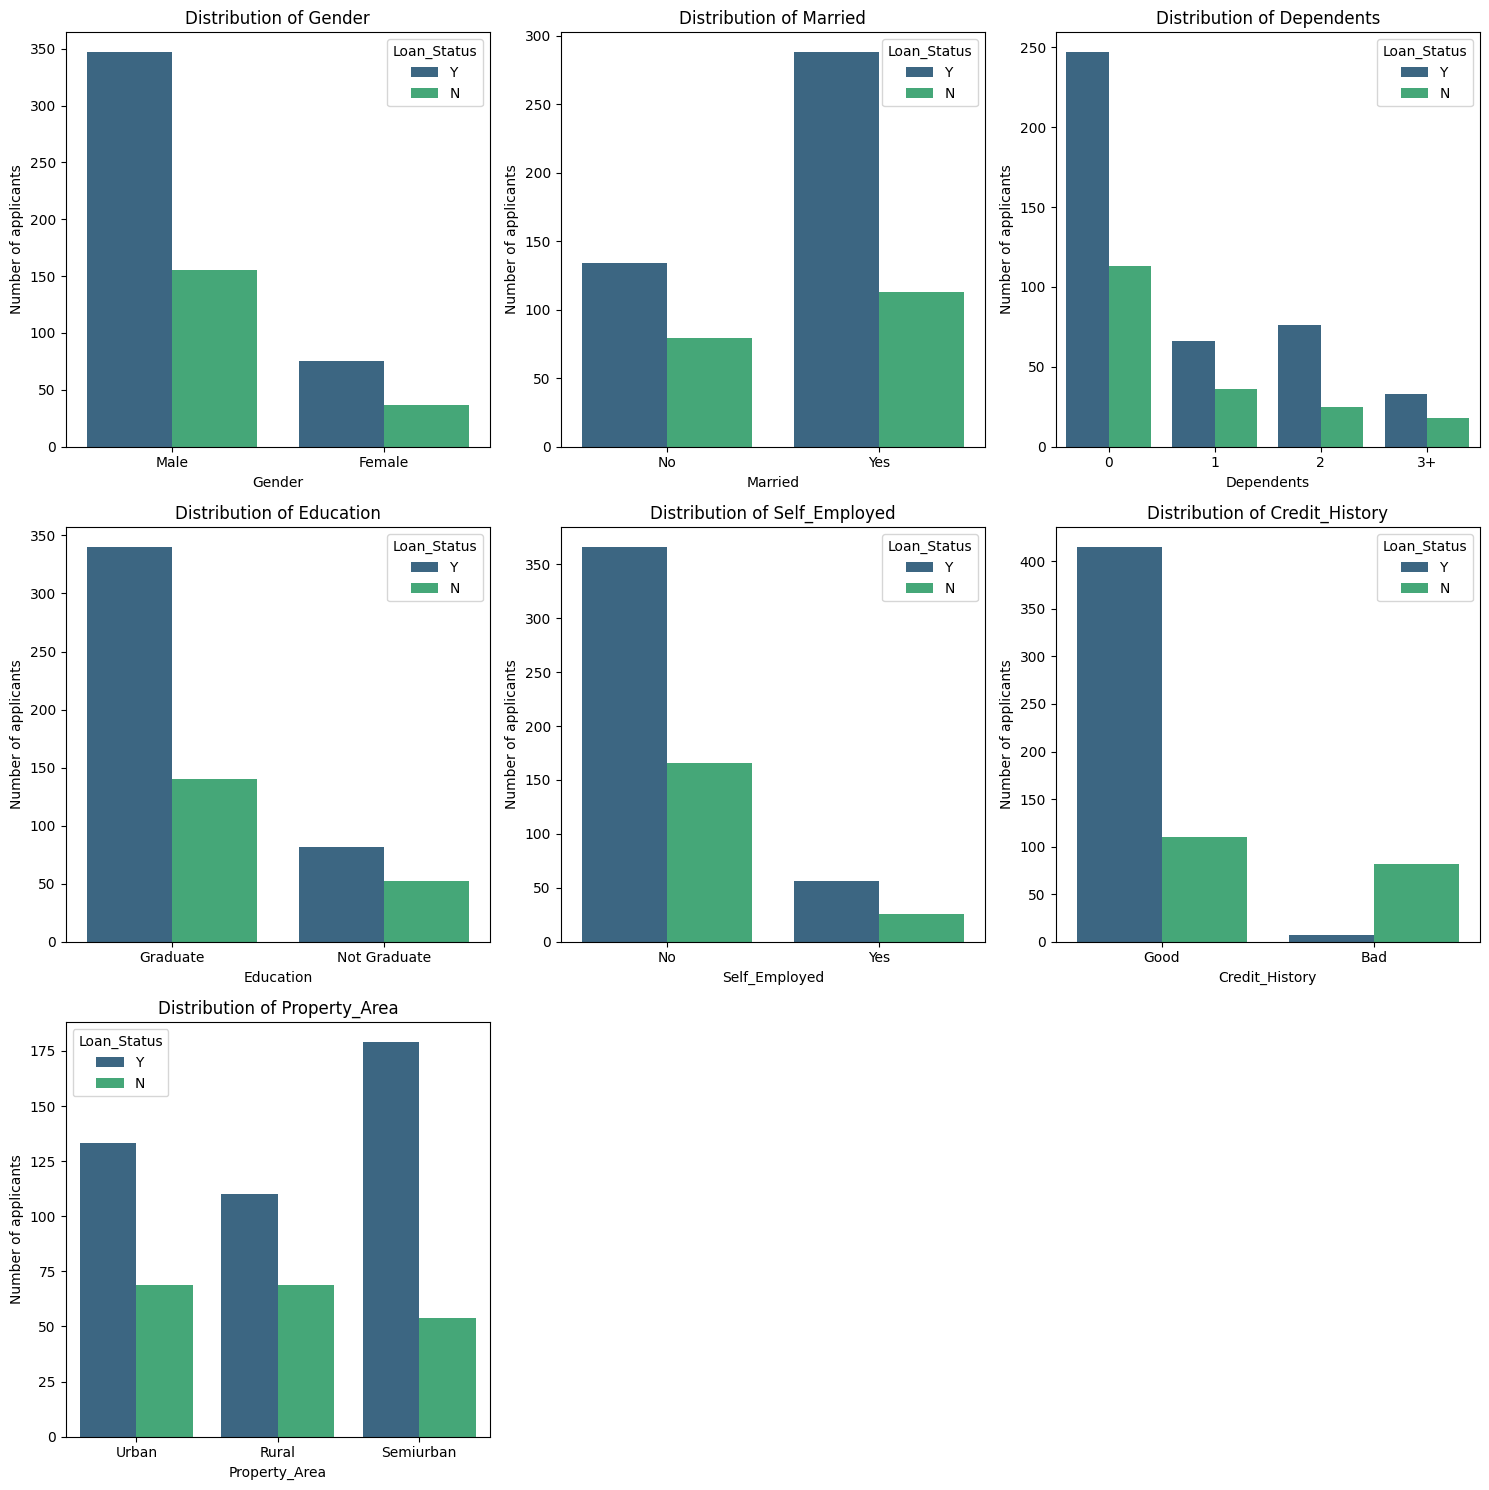

In [74]:
# Create a set of bar chart for all the categorical variables

# Select only categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns

# Remove Loan_ID column
categorical_columns = categorical_columns.drop(['Loan_ID', 'Loan_Status'])

# Determine the number of rows and columns for the sub-graphics
num_vars = len(categorical_columns)
num_cols = 3  
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)  # Calculate the number of rows needed

# Create a figure to display graphics
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten axes for easir indexing
axes = axes.flatten()

# Display bar chart for each categorical variable
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue='Loan_Status', data=df_cleaned, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Number of applicants')

# Remove empty axes if any
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Ajuste space between graphics
plt.tight_layout()
plt.show()


## Global observation:

1. An overview of the data : The dataset has 981 rows and 13 columns. 

After cleanning and fixing missing values, there are now four numeric variables including 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Loan_Amount_Term'. There are 8 categorical variables notably: 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History' and 'Loan_Status'.

2. Data quality: From the original dataset info, there were several missing values and no duplicates. The column data types were also good, but the column 'Credit_History' type could be change into an 'object' to simplify the analysis.

3. Loan statuses comparison : After filled in missing values by replacing them using median for the numerical variables and mode for the categorical variables, there are applications 80.43 % accepted and applications 19.57 % refused.

4. There are 411 applicants with dependents based on the historical dataset.

5. The mean income of self-employed applicants is higher than that of applicants who are not self-employed.

6. Applications with a credit history are no more likely to default than those without. In fact, the proportion of applications accepted among applications with a credit history is higher than that of applications without a credit history.

7. The amount of the loan correlates fairly strongly with the income of the applicant.